Question:

- Average world happines each year
- Which country with lowest and highest life ladder point each year
- Correlation between each factor with positive or negative

### Import necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Read and merge data frame

In [2]:
country = pd.read_csv('world-happiness-report.csv')

In [3]:
country_2021 = pd.read_csv('world-happiness-report-2021.csv')

In [4]:
country_2021 = country_2021[['Country name', 'Regional indicator']]

In [5]:
df = country.merge(country_2021, how = 'left', on = 'Country name')

In [6]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,South Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,South Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,South Asia


### Column Description

- Country Name: Name of the COuntry
- year: Year
- Ligfe Ladder: Happiness index (from 0 to 10)
- Log GDP per capita: Logaritmic GDP per capita
- Social Support: Having someone to count on in times of trouble
- Healthy life expectacy at birth
- Generosity: residual of regressing national average of response to the GWP question 'Have you donated money to a charity in the past month?' on GDP per capita
- Perceptions of corruption: The average percentage of how high corruption in specific country
- Positive affect: Average point of someone filling happiness during the day
- Negative affect: The average point of someone filling worry, sad and angry during the day.

## Data Pre-Processing

In [7]:
(df.isnull().sum())/df.shape[0]

Country name                        0.000000
year                                0.000000
Life Ladder                         0.000000
Log GDP per capita                  0.018471
Social support                      0.006670
Healthy life expectancy at birth    0.028220
Freedom to make life choices        0.016419
Generosity                          0.045664
Perceptions of corruption           0.056439
Positive affect                     0.011288
Negative affect                     0.008209
Regional indicator                  0.032324
dtype: float64

In [8]:
df = df.dropna()

## Data Exploratory

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 1948
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1663 non-null   object 
 1   year                              1663 non-null   int64  
 2   Life Ladder                       1663 non-null   float64
 3   Log GDP per capita                1663 non-null   float64
 4   Social support                    1663 non-null   float64
 5   Healthy life expectancy at birth  1663 non-null   float64
 6   Freedom to make life choices      1663 non-null   float64
 7   Generosity                        1663 non-null   float64
 8   Perceptions of corruption         1663 non-null   float64
 9   Positive affect                   1663 non-null   float64
 10  Negative affect                   1663 non-null   float64
 11  Regional indicator                1663 non-null   object 
dtypes: flo

Each column is of the correct data type

In [10]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000
mean,2013.332532,5.466330,9.346964,0.812152,63.429197,0.741745,-0.002030,0.750443,0.711328,0.268386
std,4.092133,1.132995,1.147341,0.119919,7.618164,0.142031,0.162967,0.187180,0.107206,0.081235
min,2005.000000,2.375000,6.635000,0.291000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.094000
25%,2010.000000,4.620500,8.435000,0.742500,58.500000,0.646000,-0.115000,0.697500,0.627000,0.208000
50%,2013.000000,5.383000,9.475000,0.836000,65.260000,0.759000,-0.028000,0.806000,0.725000,0.258000
75%,2017.000000,6.274000,10.299500,0.909000,68.800000,0.854500,0.089000,0.875000,0.803000,0.319000
max,2020.000000,7.971000,11.648000,0.987000,77.100000,0.985000,0.689000,0.983000,0.944000,0.591000


#### Life ladder distribution each year

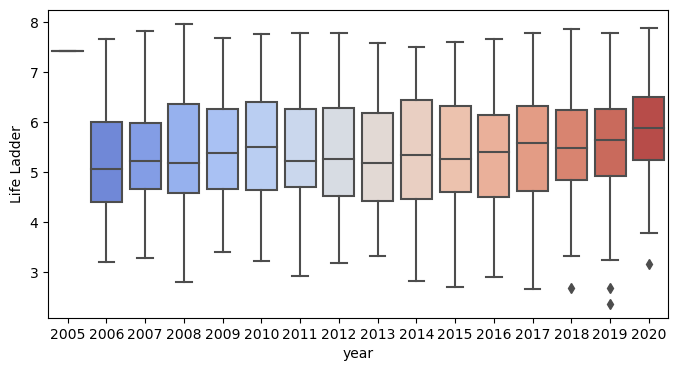

In [11]:
plt.figure(figsize = (8, 4))
sns.boxplot(data = df, y = 'Life Ladder', x = 'year', palette = 'coolwarm')
plt.show()

Outlier in year 2019

In [12]:
outlier_2019 = df[df['year'] == 2019]
list(outlier_2019[outlier_2019['Life Ladder'] < 3]['Country name'])

['Afghanistan', 'Zimbabwe']

Outlier in year 2020

In [13]:
outlier_2020 = df[df['year'] == 2020]
list(outlier_2020[outlier_2020['Life Ladder'] < 3.5]['Country name'])

['Zimbabwe']

#### Average life ladder every year

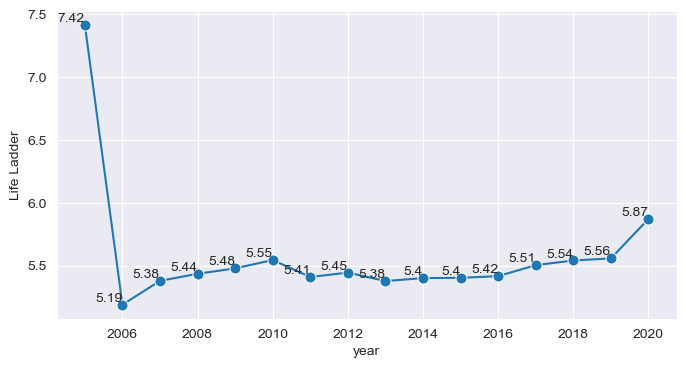

In [15]:
sns.set_style('darkgrid')
plot1 = df.groupby('year').mean()['Life Ladder']

plt.figure(figsize=(8,4))
sns.lineplot(data = plot1, marker = 'o', markersize = 8)
for i, txt in enumerate(plot1):
    plt.text(plot1.index[i], txt, round(txt, 2), ha='right', va='bottom')

plt.ylabel = 'Avg positive affect'
plt.show()

#### Life ladder point for each regional

In [49]:
regional = df.groupby('Regional indicator').mean().reset_index()
regional['Life Ladder'] = regional['Life Ladder'].astype(float)
regional_sorted  = regional.sort_values(by = 'Life Ladder', ascending = False)

<Axes: xlabel='Life Ladder', ylabel='Regional indicator'>

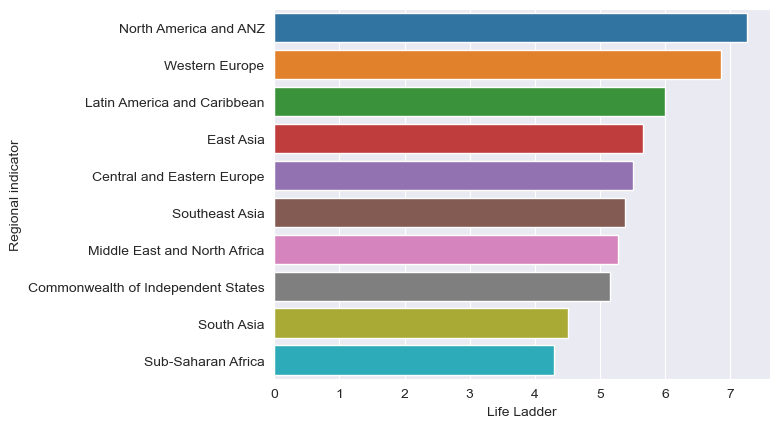

In [53]:
sns.barplot(data = regional_sorted, y = 'Regional indicator', x = 'Life Ladder')

#### Country with highest life ladder value each year

In [15]:
def highest_country (df):
    
    result = {}
    
    for year in df['year'].unique():
        choosen_year = df[df['year'] == year]
        choosen_country = choosen_year.loc[choosen_year['Life Ladder'].idxmax(), 'Country name']
        result[year] = choosen_country
        
    return result

In [16]:
highest = pd.DataFrame(list(highest_country(df).items()), columns = ['year', 'country'])
highest.sort_values(by = 'year')

,year,country
15,2005,Canada
14,2006,Finland
12,2007,Denmark
0,2008,Denmark
1,2009,Denmark
2,2010,Denmark
3,2011,Denmark
4,2012,Switzerland
5,2013,Canada
6,2014,Denmark


#### Country with lowest life ladder value each year

In [54]:
def lowest_country (df):
    
    result = {}
    
    for year in df['year'].unique():
        choosen_year = df[df['year'] == year]
        choosen_country = choosen_year.loc[choosen_year['Life Ladder'].idxmin(), 'Country name']
        result[year] = choosen_country
        
    return result

In [70]:
lowest = pd.DataFrame(list(lowest_country(df).items()), columns = ['year', 'country'])
lowest.sort_values(by = 'year')

,year,country
15,2005,Canada
14,2006,Togo
12,2007,Zimbabwe
0,2008,Togo
1,2009,Tanzania
2,2010,Tanzania
3,2011,Togo
4,2012,Benin
5,2013,Burkina Faso
6,2014,Togo


#### All time highest avg life ladder value 

In [19]:
df.groupby('Country name').mean()['Life Ladder'].idxmax()

'Denmark'

#### All time highest avg life ladder value

In [20]:
df.groupby('Country name').mean()['Life Ladder'].idxmin()

'Burundi'

#### Correlation for each column

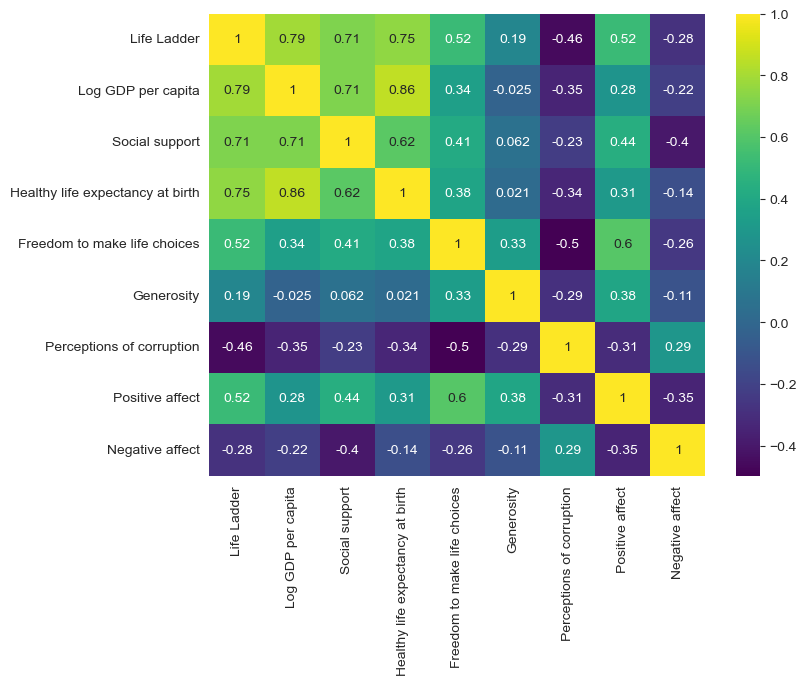

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(data = df.iloc[0:, 2:11].corr(), annot = True, cmap = 'viridis')
plt.show()

GDP percapita, Scoial Support and Health expectation when gave a birth seems give the biggest influence to the happiness level.

Text(0.5, 0.98, 'Correlation between GDP and level of happiness')

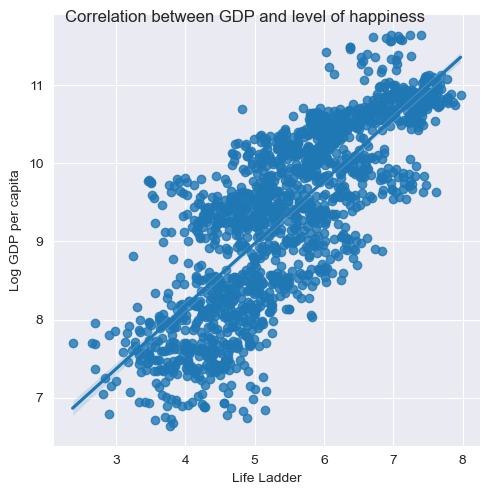

In [22]:
plot = sns.lmplot(data = df, x = 'Life Ladder', y = 'Log GDP per capita')
plot.fig.suptitle('Correlation between GDP and level of happiness')

Text(0.5, 0.98, 'Correlation between Social Support and level of happiness')

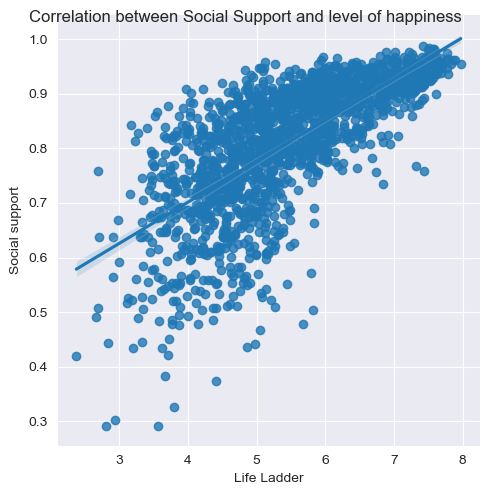

In [23]:
plot = sns.lmplot(data = df, x = 'Life Ladder', y = 'Social support')
plot.fig.suptitle('Correlation between Social Support and level of happiness')

Text(0.5, 0.98, 'Correlation between health expectacy and level of happiness')

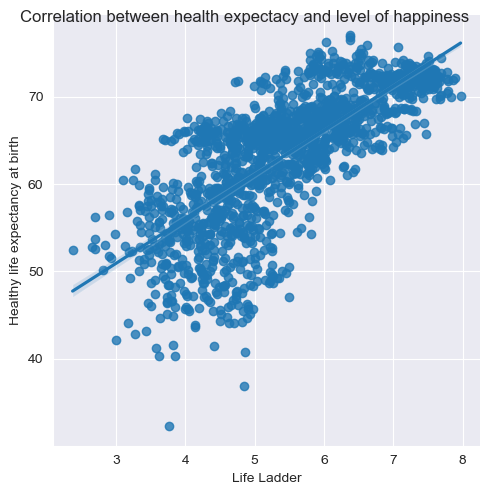

In [24]:
plot = sns.lmplot(data = df, x = 'Life Ladder', y = 'Healthy life expectancy at birth')
plot.fig.suptitle('Correlation between health expectacy and level of happiness')

Indicator that influent the most to the life ladder point. For the 5 top country it will be the indicator that has highest correlation with life ladder column, while 5 lowest country will be indicator that has the lowest correlation with life ladder column

top 5 ocuntry

In [30]:
country_list = list(df.groupby('Country name').mean().nlargest(5, 'Life Ladder').index)
country_list

['Denmark', 'Finland', 'Switzerland', 'Norway', 'Netherlands']

Text(0.5, 1.0, 'Average life ladder point of 5 top country')

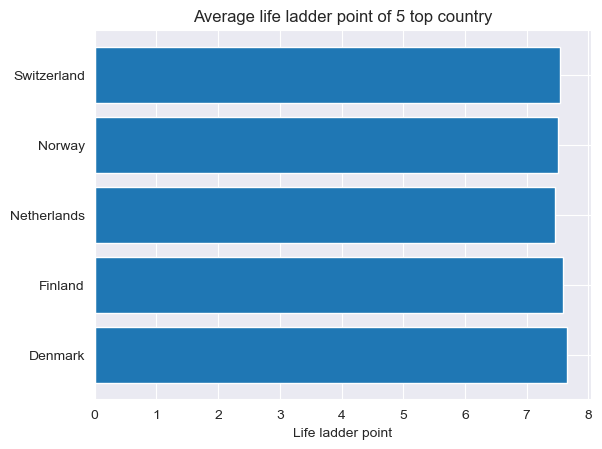

In [38]:
top5_country = df[df['Country name'].isin(country_list)]
avg_top5_country = top5_country.groupby('Country name').mean().reset_index()

plt.barh(y = avg_top5_country['Country name'], width = avg_top5_country['Life Ladder'])

plt.xlabel('Life ladder point')
plt.title('Average life ladder point of 5 top country')

In [32]:
top5_country.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,-0.093668,0.208472,-0.030550,0.741854,0.139472,-0.407461,-0.269948,0.095515,0.232010
Life Ladder,-0.093668,1.000000,-0.125125,0.480335,-0.222004,0.375106,-0.198710,-0.505083,-0.350150,-0.529403
Log GDP per capita,0.208472,-0.125125,1.000000,-0.041450,0.743393,0.031332,0.111060,0.218553,0.318253,0.016127
Social support,-0.030550,0.480335,-0.041450,1.000000,-0.117068,0.500966,-0.251869,-0.576382,-0.192199,-0.235593
Healthy life expectancy at birth,0.741854,-0.222004,0.743393,-0.117068,1.000000,0.020058,-0.241637,0.073978,0.225805,0.138112
Freedom to make life choices,0.139472,0.375106,0.031332,0.500966,0.020058,1.000000,-0.411856,-0.520740,-0.232985,-0.238557
Generosity,-0.407461,-0.198710,0.111060,-0.251869,-0.241637,-0.411856,1.000000,0.448979,0.457818,0.285518
Perceptions of corruption,-0.269948,-0.505083,0.218553,-0.576382,0.073978,-0.520740,0.448979,1.000000,0.447584,0.246426
Positive affect,0.095515,-0.350150,0.318253,-0.192199,0.225805,-0.232985,0.457818,0.447584,1.000000,0.343332
Negative affect,0.232010,-0.529403,0.016127,-0.235593,0.138112,-0.238557,0.285518,0.246426,0.343332,1.000000


Text(0.5, 1.0, 'Correlation between social support and life ladder in top 5 country')

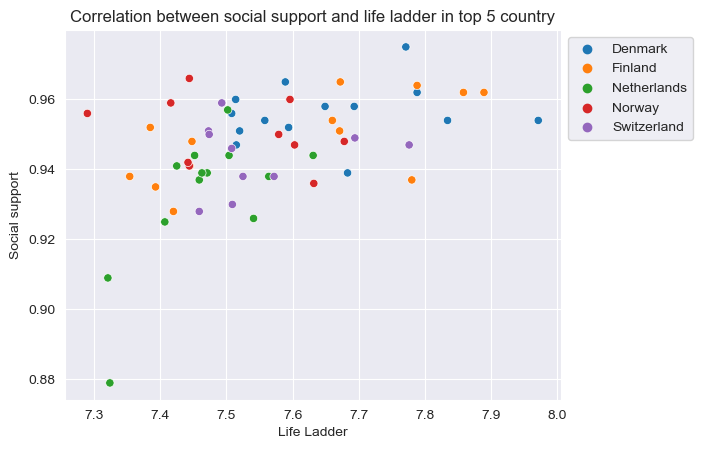

In [84]:
sns.scatterplot(data = top5_country, x = 'Life Ladder', y = 'Social support', hue = 'Country name')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Correlation between social support and life ladder in top 5 country')

Bottom 5 country

In [41]:
country_list2 = list(df.groupby('Country name').mean().nsmallest(5, 'Life Ladder').index)
country_list2

['Burundi', 'Togo', 'Afghanistan', 'Rwanda', 'Tanzania']

Text(0.5, 1.0, 'Average life ladder point of 5 top country')

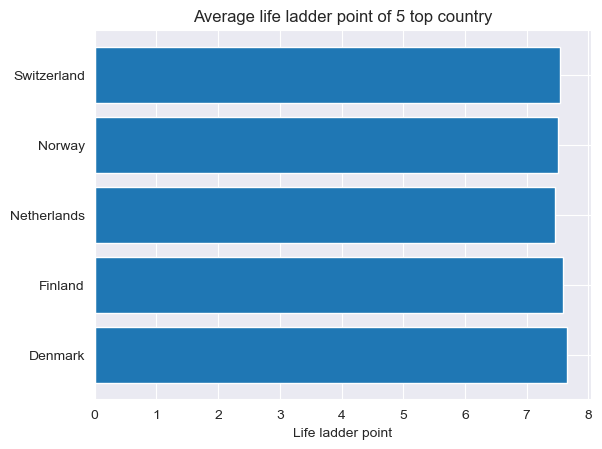

In [42]:
lowest_5country = df[df['Country name'].isin(country_list2)]
avg_top5_country = top5_country.groupby('Country name').mean().reset_index()

plt.barh(y = avg_top5_country['Country name'], width = avg_top5_country['Life Ladder'])

plt.xlabel('Life ladder point')
plt.title('Average life ladder point of 5 top country')

In [43]:
lowest_5country.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,-0.277393,0.369954,0.055065,0.675761,0.230352,-0.046100,-0.176151,0.005044,0.500292
Life Ladder,-0.277393,1.000000,-0.008445,0.237482,-0.129081,0.186743,0.298459,-0.064708,0.321081,-0.294854
Log GDP per capita,0.369954,-0.008445,1.000000,0.567186,0.439718,0.332098,0.497341,-0.022596,0.244009,-0.051397
Social support,0.055065,0.237482,0.567186,1.000000,0.323038,0.482574,0.454331,-0.133670,0.704552,-0.553324
Healthy life expectancy at birth,0.675761,-0.129081,0.439718,0.323038,1.000000,0.736836,0.105197,-0.732286,0.471841,-0.018592
Freedom to make life choices,0.230352,0.186743,0.332098,0.482574,0.736836,1.000000,0.145222,-0.737443,0.707810,-0.259207
Generosity,-0.046100,0.298459,0.497341,0.454331,0.105197,0.145222,1.000000,0.134774,0.360368,-0.328341
Perceptions of corruption,-0.176151,-0.064708,-0.022596,-0.133670,-0.732286,-0.737443,0.134774,1.000000,-0.519827,0.276574
Positive affect,0.005044,0.321081,0.244009,0.704552,0.471841,0.707810,0.360368,-0.519827,1.000000,-0.581907
Negative affect,0.500292,-0.294854,-0.051397,-0.553324,-0.018592,-0.259207,-0.328341,0.276574,-0.581907,1.000000


Text(0.5, 1.0, 'Correlation between negative effect and life ladder in 5 lowest country')

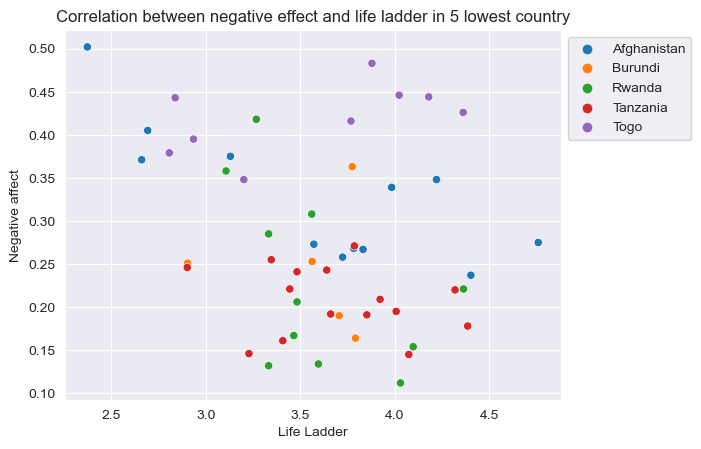

In [44]:
sns.scatterplot(data = lowest_5country, x = 'Life Ladder', y = 'Negative affect', hue = 'Country name')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Correlation between negative effect and life ladder in 5 lowest country')